Imports

In [12]:
import math
from graph import Graph
from step1 import model_antenna_frequency
from step2 import graph_coloring
from step3 import pulser_MIS
from step4 import pulser_color_graph

Step 1: Model the problem of antenna frequency

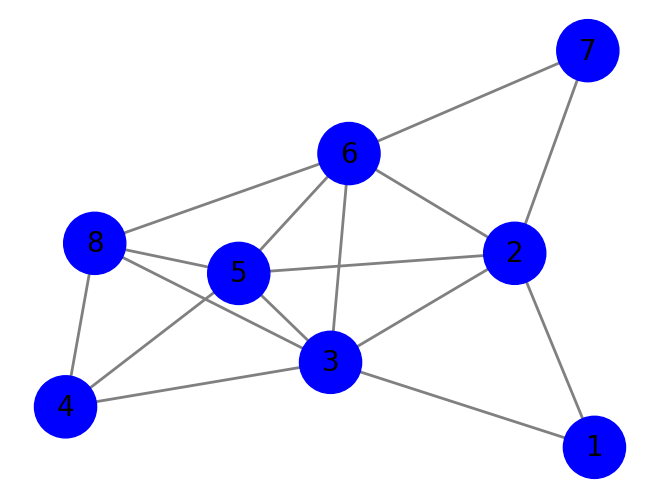

In [13]:
antenna_1 = (0, 0)
antenna_2 = (3, 5.2)
antenna_3 = (6, 0)
antenna_4 = (9, -5.2)
antenna_5 = (9, 0)
antenna_6 = (9, 5.2)
antenna_7 = (9, 10.4)
antenna_8 = (12, 0)

# Create list out of antenna's coordinates
antennas = [antenna_1, antenna_2, antenna_3, antenna_4, antenna_5, antenna_6, antenna_7, antenna_8]
max_interference_distance = 8.7

# Create adjacency list
adjacent_list, vertices = model_antenna_frequency(antennas, max_interference_distance)

# Plot Graph
graph_model = Graph(len(antennas))
graph_model.add_adjacency_list(adjacent_list)
graph_model.visualize() 

Step 2: Graph Coloring

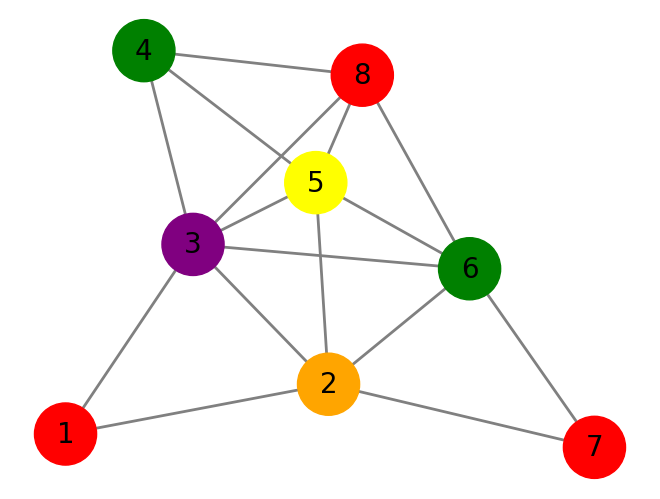

In [14]:
# Create graph
graph_classic = Graph(vertices)

# Create adjacency list (using step1 data)
graph_classic.add_adjacency_list(adjacent_list)

# Color graph by repetitively calling MIS (see step2.py)
graph_classic.color_graph(graph_coloring(adjacent_list, vertices))

# Plot Graph 
graph_classic.visualize()

Step 3: MIS Solver in Pulser

In [15]:
# Example with antennas located on a straight line at 5km intervals
antenna_1 = (0, 0)
antenna_2 = (0, 5)
antenna_3 = (0, 10)
antenna_4 = (0, 15)
antenna_5 = (0, 20)

# Create list out of antenna's coordinates
antennas_2 = [antenna_1, antenna_2, antenna_3, antenna_4, antenna_5]
maximum_interference_distance = 5

active_qubits = list(range(len(antennas_2)))

# MIS (see step3.py)
mis_1 = pulser_MIS(antennas_2, maximum_interference_distance)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_1) if bit == '0' and i in active_qubits]

# MIS
mis_2 = pulser_MIS(antennas_2, maximum_interference_distance, active_qubits)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_2) if bit == '0' and i in active_qubits]

Maximum Independent Set: [1, 3, 5]
Maximum Independent Set: [2, 4]


Step 4: Graph Coloring in Pulser

Maximum Independent Set: [1, 4, 7]
Maximum Independent Set: [2, 8]
Maximum Independent Set: [3]
Maximum Independent Set: [5]
Maximum Independent Set: [6]


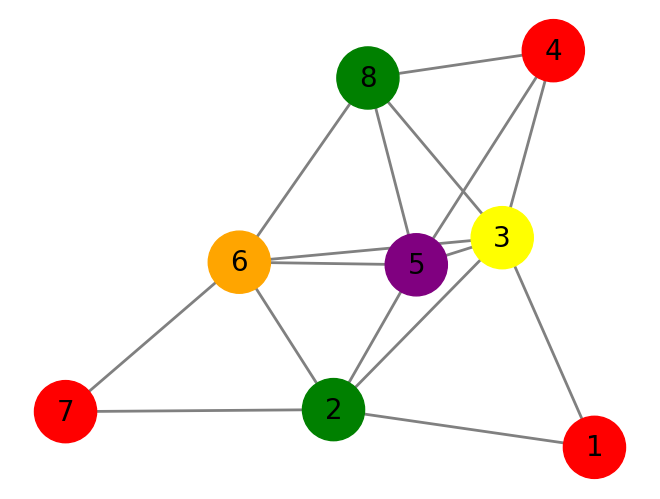

In [16]:
# We use the step1 antenna's coordinates

adjacent_list = model_antenna_frequency(antennas, max_interference_distance)[0]

# Graph initialization
graph_pulser = Graph(len(antennas))

# Create adjacency list
graph_pulser.add_adjacency_list(adjacent_list)

# Color graph by repetitively calling MIS (see step3.py)
graph_pulser.color_graph(pulser_color_graph(antennas, max_interference_distance))

# Plot Graph
graph_pulser.visualize()



In [21]:
# Get unique colors
unique_colors_classic = set(graph_classic.colors.values())
num_colors_classic = len(unique_colors_classic)

unique_colors_pulser = set(graph_pulser.colors.values())
num_colors_pulser = len(unique_colors_pulser)

print(f"The classical graph coloring implementation uses {num_colors_classic} colors")
print(f"The pulser graph coloring implementation uses {num_colors_pulser} colors")

The classical graph coloring implementation uses 5 colors
The pulser graph coloring implementation uses 5 colors
